# Taller de imputación python

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency

## Primeros vistasos y visualización de datos faltantes

In [26]:
df= pd.read_csv("https://raw.githubusercontent.com/Kalbam/Datos/refs/heads/main/base_imputacion_mixta_1000.csv")
df.head()

,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
0,2024-01-01,F,Medellín,NaN,B,Unión libre,19.0,161.821754,3574.753806,1832.731832,640.465372,119.202995
1,2024-01-02,F,Barranquilla,NaN,B,NaN,52.0,167.819566,3163.626815,NaN,533.108430,124.457874
2,2024-01-03,M,Bogotá,Secundaria,B,Soltero/a,38.0,165.756219,2765.672259,1219.535074,491.016910,NaN
3,2024-01-04,F,Bogotá,NaN,B,Casado/a,57.0,160.642670,4320.397345,1908.324816,NaN,129.426792
4,2024-01-05,M,Cali,Técnico,B,Soltero/a,67.0,151.402909,NaN,1887.385697,610.213994,133.916319


In [27]:
df.tail()

,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
995,2026-09-22,M,Cali,Universitario,B,Divorciado/a,42.0,174.029439,3900.871957,1726.737261,NaN,209.333348
996,2026-09-23,F,Cali,NaN,B,Soltero/a,57.0,172.937551,3510.958513,1158.564446,702.765666,NaN
997,2026-09-24,M,Bogotá,Técnico,NaN,Casado/a,69.0,172.978652,5835.890293,NaN,547.840036,NaN
998,2026-09-25,F,Bogotá,Posgrado,C,Casado/a,48.0,NaN,3809.637777,1275.292213,510.525079,214.627744
999,2026-09-26,M,Bogotá,Universitario,B,Soltero/a,53.0,174.410385,3766.247687,2559.455016,700.720902,204.091366


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               1000 non-null   object 
 1   sexo                980 non-null    object 
 2   ciudad              950 non-null    object 
 3   nivel_educativo     900 non-null    object 
 4   segmento            800 non-null    object 
 5   estado_civil        650 non-null    object 
 6   edad                970 non-null    float64
 7   altura_cm           920 non-null    float64
 8   ingresos            880 non-null    float64
 9   gasto_mensual       750 non-null    float64
 10  puntuacion_credito  500 non-null    float64
 11  demanda             850 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


In [29]:
df.columns

Index(['fecha', 'sexo', 'ciudad', 'nivel_educativo', 'segmento',
       'estado_civil', 'edad', 'altura_cm', 'ingresos', 'gasto_mensual',
       'puntuacion_credito', 'demanda'],
      dtype='object')

In [30]:
df.describe()

,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
count,970.000000,920.000000,880.000000,750.000000,500.000000,850.000000
mean,42.861856,167.760096,3681.294745,1687.810749,599.077500,160.305759
std,14.621382,9.275530,1079.326096,582.070174,79.828186,25.357794
min,18.000000,140.000000,487.662547,100.000000,373.657944,99.875828
25%,30.000000,161.488768,2999.416229,1309.239768,544.467843,139.505538
50%,43.000000,167.714614,3669.620507,1676.193764,599.692595,160.721251
75%,55.000000,173.999069,4375.093656,2063.260990,653.345068,181.100754
max,69.000000,195.766921,7016.246936,3532.593603,823.539585,222.093047


In [31]:
df.describe(include="object")

,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil
count,1000,980,950,900,800,650
unique,1000,2,5,4,3,4
top,2024-01-01,F,Bogotá,Secundaria,B,Soltero/a
freq,1,518,307,317,457,290


In [32]:
df["fecha"] = pd.to_datetime(df["fecha"])
df["fecha"].dtype

dtype('<M8[ns]')

In [33]:

# Calcular número y porcentaje de valores faltantes por variable
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
# Mostrar tabla resumen
missing_summary = pd.DataFrame({
    'Valores faltantes': missing_count,
    'Porcentaje (%)': missing_percent
})

missing_summary

,Valores faltantes,Porcentaje (%)
fecha,0,0.0
sexo,20,2.0
ciudad,50,5.0
nivel_educativo,100,10.0
segmento,200,20.0
estado_civil,350,35.0
edad,30,3.0
altura_cm,80,8.0
ingresos,120,12.0
gasto_mensual,250,25.0


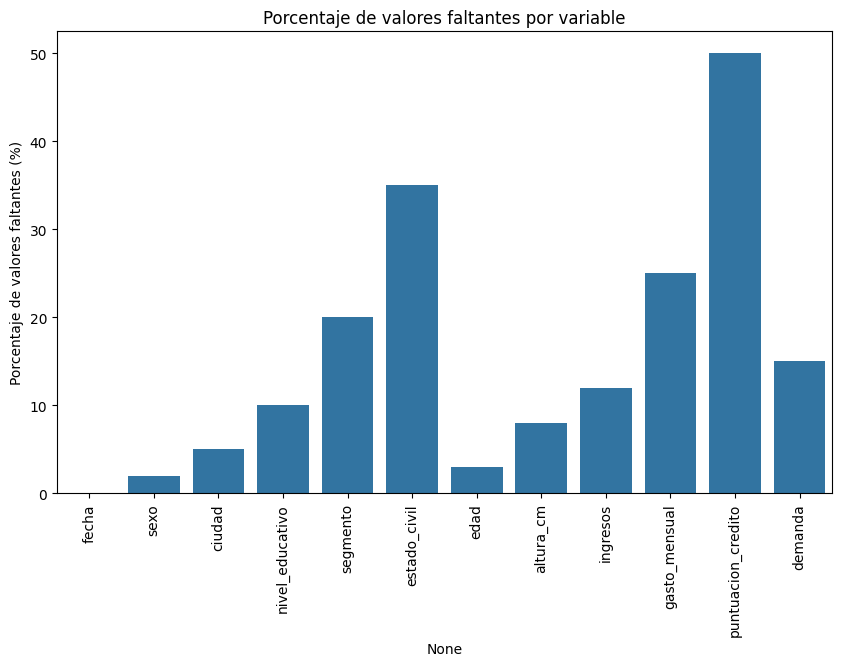

In [34]:
# Gráfico de barras del porcentaje de nulos por variable
plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de valores faltantes (%)')
plt.title('Porcentaje de valores faltantes por variable')
plt.show()


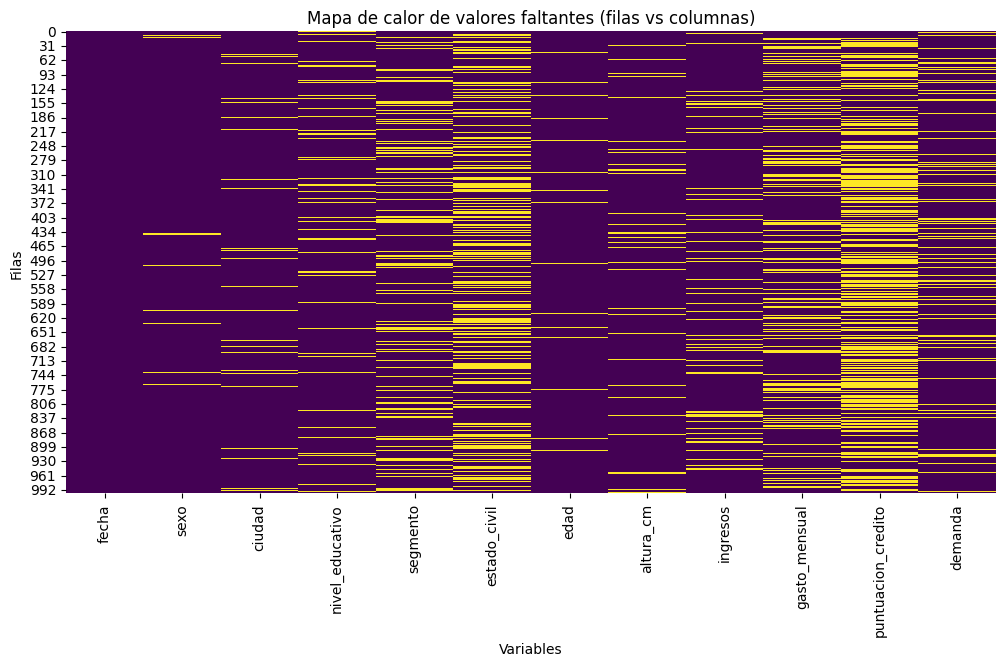

In [35]:
# Mapa de calor de valores faltantes
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes (filas vs columnas)')
plt.xlabel('Variables')
plt.ylabel('Filas')
plt.show()

## Clasificacion de datos faltantes

### MCAR
Considero que la siguienes variables tienen valores faltantes completamente al azar:
* sexo
* ciudad
* nivel_educativo
* edad
* altura

En estos casos considero que es información que suele digitarse mal o la gente olvida responder. Sexo particularmente cae en esta categoria debido a que tiene muy pocos valores faltantes, pues de lo contrario se podria hacer otro analisis. En el caso de variables como nivel educativo mucha gente a veces no encuentra una respuesta acorde al su nivel.

### MAR

* gastos mensual
* demanda
* segmento

Considerando que segmento se puede referir algun tipo de nivel social de la persona, estas 3 varaibles podrian considerarse fuertemente relacionadas al ingreso de las personas.

### MNAR
Considero que las siguiente varaibles pueden tener datos faltantes debido la sensibilidad del dato
* estado_civil
* ingresos
* gasto_mensual
* puntuación_credito


Tantto el estado civil, los ingresos, los gastos mensuales y la puntución de credito los consideraria como información que las peronas no estan dispuestas a compartir, pues es considerado informacion muy personal

## Disución sobre  imputabilidad

### Sexo
Considero que si se puede  imputar esta variable pues solo hay un 2% de datos faltantes. Imputar los datos faltantes de esta variable no supondria mucho riesgo, pues son muy pocos los registros sin datos. Se podria imputar por moda, puesto que es una variable categorica.

### Ciudad
Considerando que tiene un 5% de valores faltante aun se podria impuar por moda, aun considero que no existe riesgo en realizar impuación pues un 5% de datos faltantes aun es considerado optimo para imputar.

###  nivel educativo 
En este caso tenemos un 10% de valores faltantes y aun es posible imputar por moda sin mucho riesgo

### edad
La variable solo cuenta con un 3% de valores faltantes, en estee caso se puede revisar la distribución de los datos  decidir si imputar o media o mediana. No habria demasiado riesgo al imputar pusto que es un porcentaje bajo    

### altura
Con un 8% de datos faltantes hay que tener cudado a la hora de imputar. Al tratarse de una variable numerica se pueden usar metodos de imputación simple, como mediana o media.

### estado civil
Es la segunda variable con más datos faltantes, alcanzando un 35%, imputar en el caso de esta variable es muy riesgoso, aunque dependiendo del estudio que se decida hacer podria no afectaar tanto. Para este tipo de casos recomendaria no imputar pues es un dato sensible.

### ingresos
Si se jsutifica imputar esta variable, pues aunque haya un 12% de valores faltantes el origen de estos nos permite intuir que se pueden imputar mediante regresión y obtener un valor aproximadamente real.

### gasto mensual
En gasto mensual un cuarto de los datos son Nan deibdo a que esta podria ser una varaible sensible para el usuario es riesgoso imputar con metodos sencillos y se necsita realizar metodos más avanzados para hacer un buen analisis de como imputar la variable

### puntuacion de credito
Esta variable tiene un porentaje alto de valores faltantes, siendo un 50% Nan. Aqui se podria creer que muchas personas tal vez tienen un puntaje 0 de credito y esto fue tomado como Nan, por lo que imputar podria ser muy riesgoso.



## Tabla resumén



|      Variable     |     % de faltante      |Razón de ausencia|      Metodo de imputación     |
|-----------|-----------|-----------|----------|
|        Sexo   |     2%      |     MCAR   |Moda|
|      Ciudad     |    5%       |      MCAR     |Moda |
|         Nivel educativo  |       10%    |   MNAR        |   Moda  |
|      edad     |       3%    |        MCAR    |    Media o mediana, depende de la distribución          |
|     altura      |    8%       |       MCAR      |   Media o mediana, depende de la distribución        |
|         estado civil  |   35%         |    MNAR       |    Moda     |
|        ingresos   |  12%         |    MNAR       | Regresion|  
|    gasto mensual       |      25%     |   MAR        |    Regresion |
|        puntuación credito   |    50%       |    MNAR       | No imputar|
|        demanda   |    15%       |        MAR   |   No imputar  |
|       segmento    |   20%        |     MAR      |  Moda  |



## Analisis variable númericas

In [36]:

numericas = ["altura_cm", "edad", "ingresos",'gasto_mensual']
for var in numericas:
    stat, p = shapiro(df[var].dropna())
    print(f'\nVariable: {var}, Estadístico: {stat}, p-valor: {p} \n')
    if p > 0.05:
        print(f'La variable {var} sigue una distribución normal (no se rechaza H0) \n')
    else:
        print(f' La variable {var} no sigue una distribución normal (se rechaza H0)\n')


Variable: altura_cm, Estadístico: 0.9984419009547882, p-valor: 0.5911471524051286 

La variable altura_cm sigue una distribución normal (no se rechaza H0) 


Variable: edad, Estadístico: 0.959825401157566, p-valor: 1.1321854217553133e-15 

 La variable edad no sigue una distribución normal (se rechaza H0)


Variable: ingresos, Estadístico: 0.9978572126690556, p-valor: 0.3244752066997847 

La variable ingresos sigue una distribución normal (no se rechaza H0) 


Variable: gasto_mensual, Estadístico: 0.9982892439956893, p-valor: 0.6752080656095224 

La variable gasto_mensual sigue una distribución normal (no se rechaza H0) 



Ahora sabemos que la unica que no sigue una distribución normal es la edad, por lo que procederemos a imputar por mediana, las demás al seguir una distribución normal, podemos impuatarlas tanto por media en el caso de altura y tanto ingresos como gastos mensuales por regresion .

### Imputación variables númericas

In [37]:
# Imputación para variables numéricas
df_imputed = df.copy()
# Media
imputer_mean = SimpleImputer(strategy='mean')
df_imputed[['altura_cm']] = imputer_mean.fit_transform(df[['altura_cm']])

# Mediana
imputer_median = SimpleImputer(strategy='median')
df_imputed[['edad']] = imputer_median.fit_transform(df[['edad']])

Na_altura_antes = df['altura_cm'].isnull().sum()
Na_edad_antes = df['edad'].isnull().sum()
Na_altura_despues = df_imputed['altura_cm'].isnull().sum()
Na_edad_despues = df_imputed['edad'].isnull().sum()
print(f'Valores nulos en altura antes: {Na_altura_antes}, después: {Na_altura_despues}')
print(f'Valores nulos en edad antes: {Na_edad_antes}, después: {Na_edad_despues}')


Valores nulos en altura antes: 80, después: 0
Valores nulos en edad antes: 30, después: 0


In [38]:
X = pd.get_dummies(df[["edad", "nivel_educativo", "ciudad", "segmento"]],
                   drop_first=True)
y = df["ingresos"]

mask_train = y.notna()

model = LinearRegression()
model.fit(X[mask_train].fillna(0), y[mask_train])

mask_pred = y.isna()
y_pred = model.predict(X[mask_pred].fillna(0))

df_imputed.loc[mask_pred, "ingresos"] = y_pred


nulos_antes = df["ingresos"].isna().sum()
pct_antes = (nulos_antes / len(df)) * 100

print(f"Nulos en 'ingresos' ANTES de imputar: {nulos_antes} ({pct_antes:.2f}%)")


nulos_despues = df_imputed["ingresos"].isna().sum()
pct_despues = (nulos_despues / len(df_imputed)) * 100

print(f"Nulos en 'ingresos' DESPUÉS de imputar: {nulos_despues} ({pct_despues:.2f}%)")

Nulos en 'ingresos' ANTES de imputar: 120 (12.00%)
Nulos en 'ingresos' DESPUÉS de imputar: 0 (0.00%)


In [39]:
X = pd.get_dummies(df[["edad", "ingresos", "nivel_educativo", "ciudad", "segmento"]],
                   drop_first=True)
y = df["gasto_mensual"]

mask_train = y.notna()

model = LinearRegression()
model.fit(X[mask_train].fillna(0), y[mask_train])

mask_pred = y.isna()
y_pred = model.predict(X[mask_pred].fillna(0))

df_imputed.loc[mask_pred, "gasto_mensual"] = y_pred


nulos_antes = df["gasto_mensual"].isna().sum()
pct_antes = (nulos_antes / len(df)) * 100

print(f"Nulos en 'gasto_mensual' ANTES de imputar: {nulos_antes} ({pct_antes:.2f}%)")


nulos_despues = df_imputed["gasto_mensual"].isna().sum()
pct_despues = (nulos_despues / len(df_imputed)) * 100

print(f"Nulos en 'gasto_mensual' DESPUÉS de imputar: {nulos_despues} ({pct_despues:.2f}%)")

Nulos en 'gasto_mensual' ANTES de imputar: 250 (25.00%)
Nulos en 'gasto_mensual' DESPUÉS de imputar: 0 (0.00%)


### Visualización de los resultados

Text(0.5, 1.0, 'Media altura_cm')

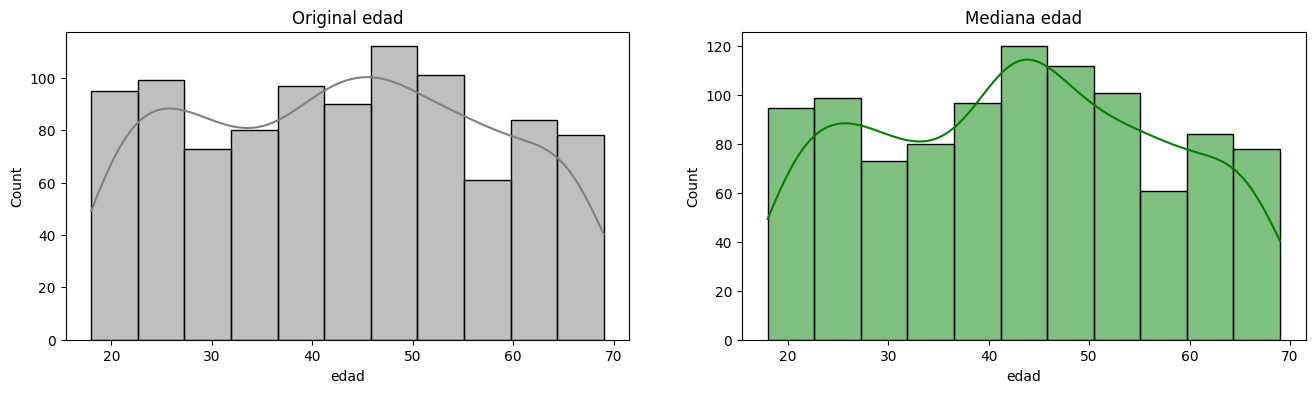

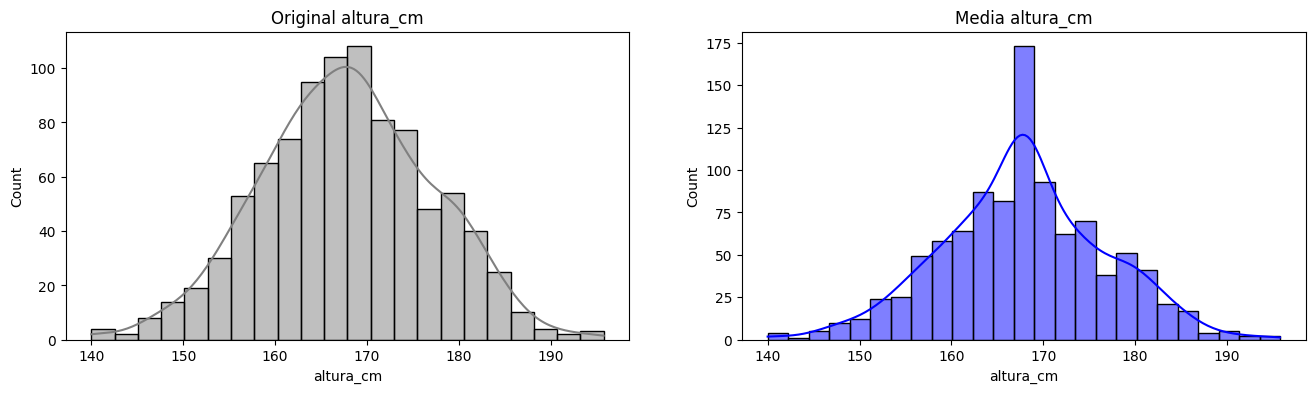

In [54]:
# Gráficos comparativos antes y después de imputar
# Numéricas: histogramas y boxplots

fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.histplot(df['edad'], ax=axes[0], kde=True, color='gray')
axes[0].set_title(f'Original {'edad'}')
sns.histplot(df_imputed['edad'], ax=axes[1], kde=True, color='green')
axes[1].set_title(f'Mediana {'edad'}')

fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.histplot(df['altura_cm'], ax=axes[0], kde=True, color='gray')
axes[0].set_title(f'Original {'altura_cm'}')
sns.histplot(df_imputed['altura_cm'], ax=axes[1], kde=True, color='blue')
axes[1].set_title(f'Media {'altura_cm'}')



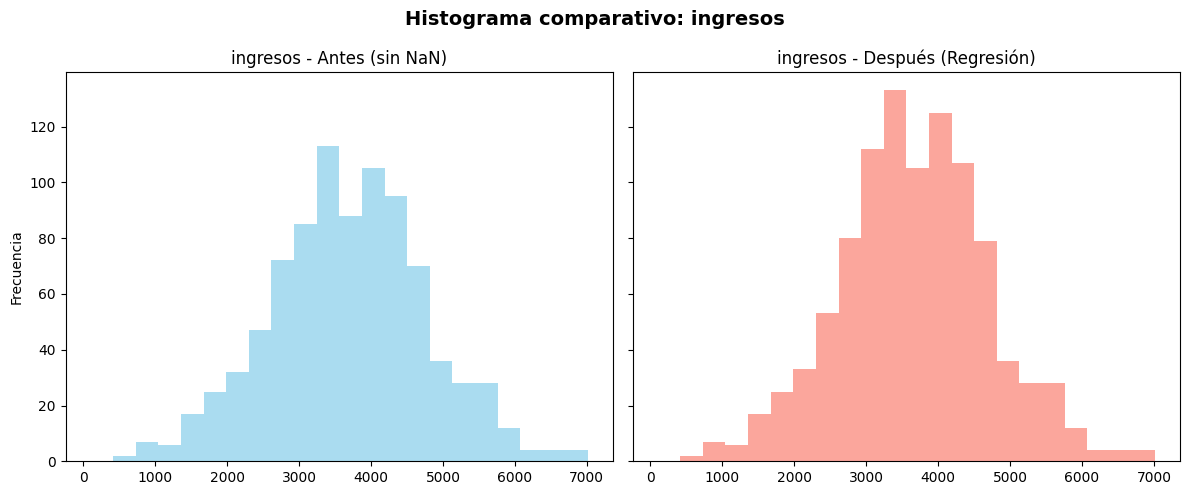

In [41]:
bins = np.histogram_bin_edges(np.concatenate([df['ingresos'].dropna().values, df_imputed['gasto_mensual'].values]), bins="auto")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].hist(df['ingresos'].dropna(), bins=bins, alpha=0.7, color="skyblue")
axes[0].set_title(f"{'ingresos'} - Antes (sin NaN)")
axes[0].set_ylabel("Frecuencia")

axes[1].hist(df_imputed['ingresos'], bins=bins, alpha=0.7, color="salmon")
axes[1].set_title(f"{'ingresos'} - Después (Regresión)")

plt.suptitle(f"Histograma comparativo: {'ingresos'}", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

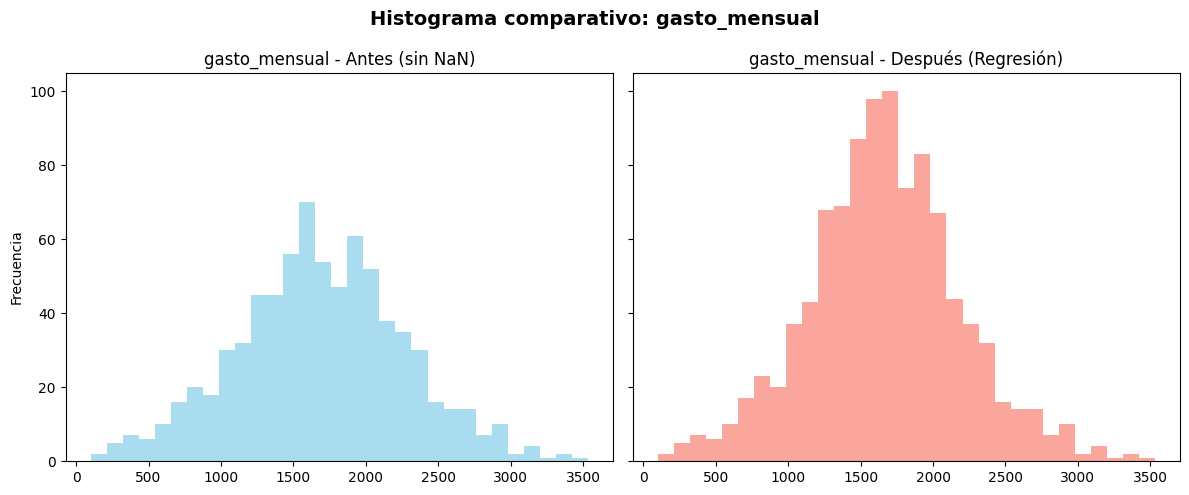

In [42]:
bins = np.histogram_bin_edges(np.concatenate([df['gasto_mensual'].dropna().values, df_imputed['gasto_mensual'].values]), bins="auto")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].hist(df['gasto_mensual'].dropna(), bins=bins, alpha=0.7, color="skyblue")
axes[0].set_title(f"{'gasto_mensual'} - Antes (sin NaN)")
axes[0].set_ylabel("Frecuencia")

axes[1].hist(df_imputed['gasto_mensual'], bins=bins, alpha=0.7, color="salmon")
axes[1].set_title(f"{'gasto_mensual'} - Después (Regresión)")

plt.suptitle(f"Histograma comparativo: {'gasto_mensual'}", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

### Comprobación de la imputación

In [52]:
for var in numericas:
    stat, p = shapiro(df_imputed[var])
    print(f'\nVariable: {var}, Estadístico: {stat}, p-valor: {p} \n')
    if p > 0.05:
        print(f'La variable {var} sigue una distribución normal (no se rechaza H0) \n')
    else:
        print(f' La variable {var} no sigue una distribución normal (se rechaza H0)\n')


Variable: altura_cm, Estadístico: 0.9954444251313341, p-valor: 0.004479207251547372 

 La variable altura_cm no sigue una distribución normal (se rechaza H0)


Variable: edad, Estadístico: 0.9634556251288727, p-valor: 3.92509288473661e-15 

 La variable edad no sigue una distribución normal (se rechaza H0)


Variable: ingresos, Estadístico: 0.9969166093344519, p-valor: 0.049775236804928416 

 La variable ingresos no sigue una distribución normal (se rechaza H0)


Variable: gasto_mensual, Estadístico: 0.9950825892483605, p-valor: 0.002532184660350719 

 La variable gasto_mensual no sigue una distribución normal (se rechaza H0)



Con esto podemos ver que despues de imputar las variables ninguna sigue una distribución normal. Por lo que, al comparar las distribuciones antes y despues usaremos la prueba Mann-whitne U para ver si las distribuciones son iguales o no

In [53]:
from scipy.stats import mannwhitneyu
for var in numericas:
    # Eliminar NaN de ambas muestras
    original = df[var].dropna()
    imputed = df_imputed[var].dropna()

    # Prueba de Mann-Whitney U
    stat, p = mannwhitneyu(original, imputed, alternative='two-sided')
    print(f"\nVariable: {var}")
    print(f"Estadístico U: {stat:.3f}")
    print(f"p-valor: {p:.5f}")
    if p > 0.05:
        print("No se rechaza H0: Las distribuciones son iguales.")
    else:
        print("Se rechaza H0: Las distribuciones son diferentes.")


Variable: altura_cm
Estadístico U: 459840.000
p-valor: 0.98951
No se rechaza H0: Las distribuciones son iguales.

Variable: edad
Estadístico U: 485075.000
p-valor: 0.99529
No se rechaza H0: Las distribuciones son iguales.

Variable: ingresos
Estadístico U: 444364.000
p-valor: 0.71025
No se rechaza H0: Las distribuciones son iguales.

Variable: gasto_mensual
Estadístico U: 384684.000
p-valor: 0.35462
No se rechaza H0: Las distribuciones son iguales.


En todas obtuvimos que las distribuciones son iguales, por lo que la imputación mantuvo la distribución, a pesar de que ahora no son normales

## Imputación de variables categoricas

In [45]:
imputer_mode = SimpleImputer(strategy='most_frequent')
df_imputed[['sexo']] = imputer_mode.fit_transform(df[['sexo']])

imputer_mode = SimpleImputer(strategy='most_frequent')
df_imputed[['ciudad']] = imputer_mode.fit_transform(df[['ciudad']])
Na_sexo_antes = df['sexo'].isnull().sum()
Na_ciudad_antes = df['ciudad'].isnull().sum()
Na_sexo_despues = df_imputed['sexo'].isnull().sum()
Na_ciudad_despues = df_imputed['ciudad'].isnull().sum()
print(f'Valores nulos en sexo antes: {Na_sexo_antes}, después: {Na_sexo_despues}')
print(f'Valores nulos en ciudad antes: {Na_ciudad_antes}, después: {Na_ciudad_despues}')

Valores nulos en sexo antes: 20, después: 0
Valores nulos en ciudad antes: 50, después: 0


In [ ]:
def hot_deck_group(df, col, group, random_state=42):
    rng = np.random.default_rng(random_state)
    out = df[col].copy()
    for g, sub in df.groupby(group):
        pool = sub[col].dropna().to_numpy()
        idx = sub.index[sub[col].isna()]
        if pool.size > 0 and len(idx) > 0:
            out.loc[idx] = rng.choice(pool, size=len(idx), replace=True)
    return out

df_imputed['nivel_educativo'] = hot_deck_group(df, 'nivel_educativo', 'ciudad')
df_imputed['estado_civil'] = hot_deck_group(df, 'estado_civil', 'edad')
df_imputed['segmento'] = hot_deck_group(df, 'segmento', 'ingresos')
df_imputed['nivel_educativo'] = hot_deck_group(df, 'nivel_educativo', 'ciudad')
df_imputed['estado_civil'] = hot_deck_group(df, 'estado_civil', 'edad')
df_imputed['segmento'] = hot_deck_group(df, 'segmento', 'ingresos')

Na_nivel_antes = df['nivel_educativo'].isnull().sum()
Na_estado_antes = df['estado_civil'].isnull().sum()
Na_segmento_antes = df['segmento'].isnull().sum()
Na_nivel_despues = df_imputed['nivel_educativo'].isnull().sum()
Na_estado_despues = df_imputed['estado_civil'].isnull().sum()
Na_segmento_despues = df_imputed['segmento'].isnull().sum()
print(f'Valores nulos en nivel_educativo antes: {Na_nivel_antes}, después: {Na_nivel_despues}')
print(f'Valores nulos en estado_civil antes: {Na_estado_antes}, después: {Na_estado_despues}')
print(f'Valores nulos en segmento antes: {Na_segmento_antes}, después: {Na_segmento_despues}')

Valores nulos en nivel_educativo antes: 100, después: 2
Valores nulos en estado_civil antes: 350, después: 12
Valores nulos en segmento antes: 200, después: 200


### Visulización y verificación de la imputación

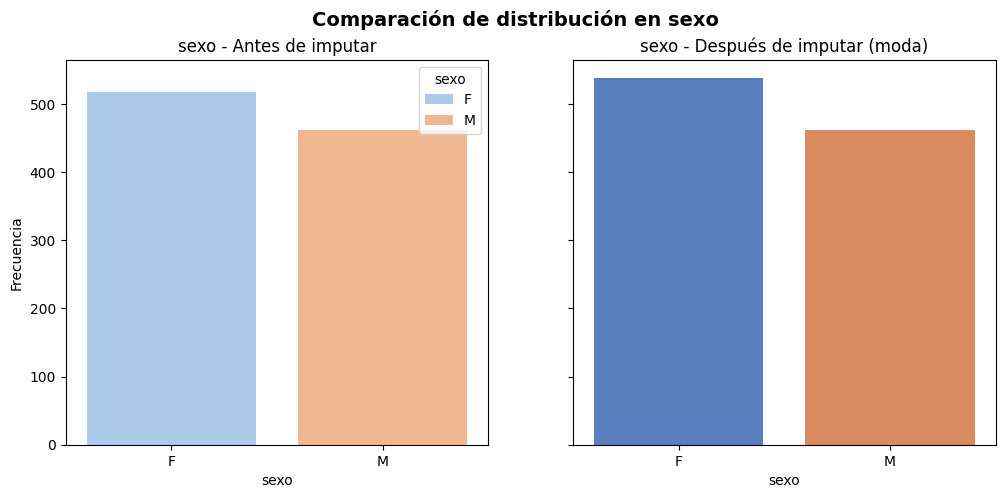

=== sexo ===
Proporciones antes:
 sexo
F    0.529
M    0.471
Name: count, dtype: float64
Proporciones después:
 sexo
F    0.538
M    0.462
Name: count, dtype: float64
Chi2 = 0.141, gl = 1, p = 0.7074 →  No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


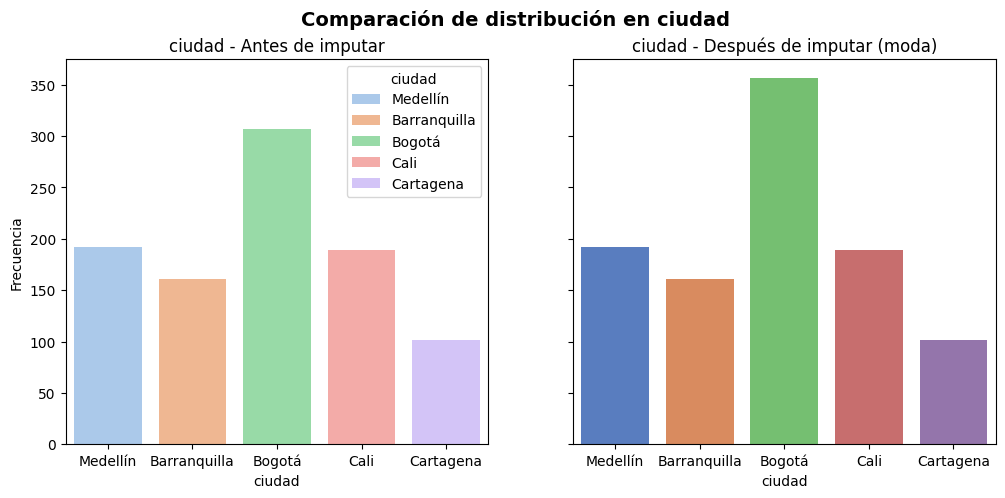

=== ciudad ===
Proporciones antes:
 ciudad
Barranquilla    0.169
Bogotá          0.323
Cali            0.199
Cartagena       0.106
Medellín        0.202
Name: count, dtype: float64
Proporciones después:
 ciudad
Barranquilla    0.161
Bogotá          0.357
Cali            0.189
Cartagena       0.101
Medellín        0.192
Name: count, dtype: float64
Chi2 = 2.485, gl = 4, p = 0.6474 →  No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


In [ ]:
variables = ["sexo", "ciudad"]

for var in variables:
   
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    sns.countplot(x=var,data=df, ax=axes[0], palette="pastel",hue=var)
    axes[0].set_title(f"{var} - Antes de imputar")
    axes[0].set_ylabel("Frecuencia")

    sns.countplot(x=var,data=df_imputed, ax=axes[1], palette="muted",hue=var)
    axes[1].set_title(f"{var} - Después de imputar (moda)")
    axes[1].set_ylabel("Frecuencia")

    plt.suptitle(f"Comparación de distribución en {var}", fontsize=14, weight="bold")
    plt.show()

    
    orig_counts = df[var].value_counts().sort_index()
    imp_counts = df_imputed[var].value_counts().sort_index()

    
    orig_counts, imp_counts = orig_counts.align(imp_counts, fill_value=0)

    tabla = pd.DataFrame({"original": orig_counts, "imputada": imp_counts}).T

    chi2, p, dof, expected = chi2_contingency(tabla)

    print(f"=== {var} ===")
    print("Proporciones antes:\n", (orig_counts / orig_counts.sum()).round(3))
    print("Proporciones después:\n", (imp_counts / imp_counts.sum()).round(3))
    print(f"Chi2 = {chi2:.3f}, gl = {dof}, p = {p:.4f} → ",
          "No se rechaza H0 (distribuciones iguales)" if p > 0.05 else "Se rechaza H0 (distribuciones diferentes)")
    print("-"*60)

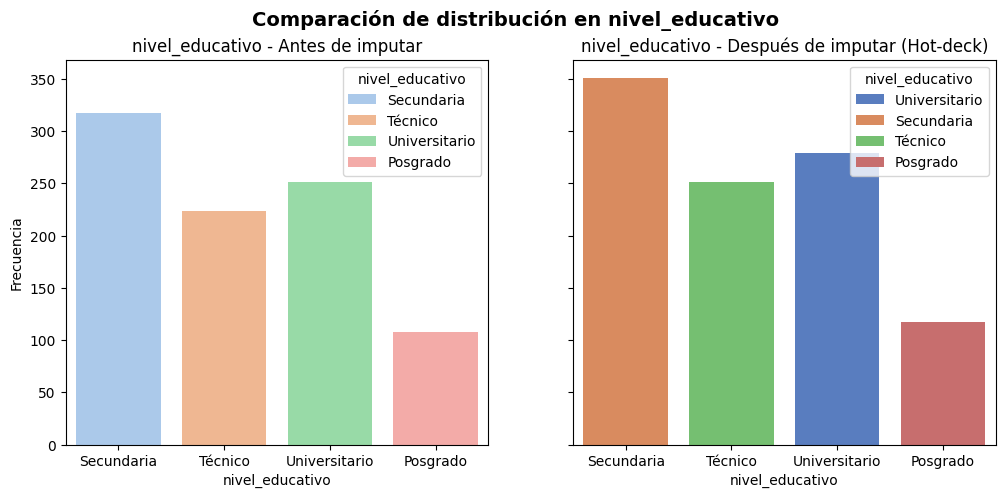

=== nivel_educativo ===
Proporciones antes:
 nivel_educativo
Posgrado         0.120
Secundaria       0.352
Técnico          0.249
Universitario    0.279
Name: count, dtype: float64
Proporciones después:
 nivel_educativo
Posgrado         0.117
Secundaria       0.352
Técnico          0.252
Universitario    0.280
Name: count, dtype: float64
Chi2 = 0.045, gl = 3, p = 0.9975 →  No se rechaza H0 (distribuciones iguales)
Cramér's V = 0.005 (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)
------------------------------------------------------------


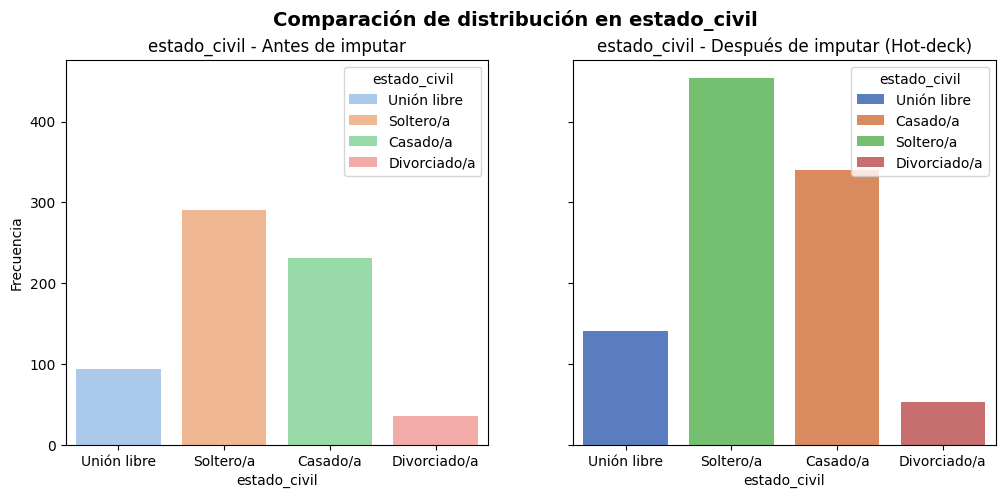

=== estado_civil ===
Proporciones antes:
 estado_civil
Casado/a        0.355
Divorciado/a    0.055
Soltero/a       0.446
Unión libre     0.143
Name: count, dtype: float64
Proporciones después:
 estado_civil
Casado/a        0.344
Divorciado/a    0.054
Soltero/a       0.460
Unión libre     0.143
Name: count, dtype: float64
Chi2 = 0.319, gl = 3, p = 0.9565 →  No se rechaza H0 (distribuciones iguales)
Cramér's V = 0.014 (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)
------------------------------------------------------------


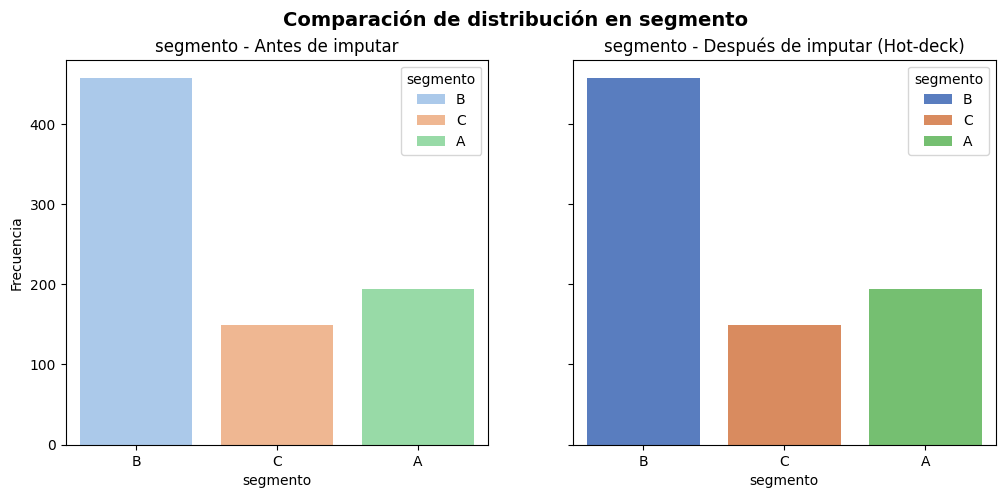

=== segmento ===
Proporciones antes:
 segmento
A    0.242
B    0.571
C    0.186
Name: count, dtype: float64
Proporciones después:
 segmento
A    0.242
B    0.571
C    0.186
Name: count, dtype: float64
Chi2 = 0.000, gl = 2, p = 1.0000 →  No se rechaza H0 (distribuciones iguales)
Cramér's V = 0.000 (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)
------------------------------------------------------------


In [51]:
def cramers_v(ct):
    chi2, _, _, _ = chi2_contingency(ct, correction=False)
    n = ct.to_numpy().sum()
    k = min(ct.shape)-1
    return np.sqrt(chi2 / (n * k)) if n > 0 and k > 0 else np.nan


variables = ["nivel_educativo", "estado_civil", "segmento"]

for var in variables:
  
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    sns.countplot(x=var,data=df, ax=axes[0], palette="pastel",hue=var,
                  order=df[var].dropna().unique())
    axes[0].set_title(f"{var} - Antes de imputar")
    axes[0].set_ylabel("Frecuencia")

    sns.countplot(x=var,data=df_imputed, ax=axes[1], palette="muted",hue=var,
                  order=df[var].dropna().unique())
    axes[1].set_title(f"{var} - Después de imputar (Hot-deck)")
    axes[1].set_ylabel("Frecuencia")

    plt.suptitle(f"Comparación de distribución en {var}", fontsize=14, weight="bold")
    plt.show()

    
    orig_counts = df[var].value_counts().sort_index()
    imp_counts = df_imputed[var].value_counts().sort_index()
    orig_counts, imp_counts = orig_counts.align(imp_counts, fill_value=0)
    ct = pd.DataFrame({"original": orig_counts, "imputada": imp_counts}).T

    chi2, p, dof, exp = chi2_contingency(ct)
    v = cramers_v(ct)

    print(f"=== {var} ===")
    print("Proporciones antes:\n", (orig_counts / orig_counts.sum()).round(3))
    print("Proporciones después:\n", (imp_counts / imp_counts.sum()).round(3))
    print(f"Chi2 = {chi2:.3f}, gl = {dof}, p = {p:.4f} → ",
          "No se rechaza H0 (distribuciones iguales)" if p > 0.05 else "Se rechaza H0 (distribuciones diferentes)")
    print(f"Cramér's V = {v:.3f} (≈0: muy similar; 0.1: pequeño; 0.3: mediano; 0.5: grande)")
    print("-"*60)

## Conclusiones finales

|      Variable     |     % de faltante      |Razón de ausencia|      Metodo sugerido de imputación     | Evidencia de que se mantiene o no la distribución
|-----------|-----------|-----------|----------|-----------|
|        Sexo   |     2%      |     MCAR   |Moda| Chi2 = 0.141, gl = 1, p = 0.7074 →  No se rechaza H0 (distribuciones iguales)|
|      Ciudad     |    5%       |      MCAR     |Moda |Chi2 = 2.485, gl = 4, p = 0.6474 →  No se rechaza H0 (distribuciones iguales)|
|         Nivel educativo  |       10%    |   MNAR        |   Moda  |Chi2 = 0.045, gl = 3, p = 0.9975 →  No se rechaza H0 (distribuciones iguales)|
|      edad     |       3%    |        MCAR    |  Mediana         |Estadístico U: 485075.000 p-valor: 0.99529 No se rechaza H0: Las distribuciones son iguales.|
|     altura      |    8%       |       MCAR      |   Media  |Estadístico U: 459840.000 p-valor: 0.98951 No se rechaza H0: Las distribuciones son iguales.|
|         estado civil  |   35%         |    MNAR       |    Moda     |Chi2 = 0.319, gl = 3, p = 0.9565 →  No se rechaza H0 (distribuciones iguales)|
|        ingresos   |  12%         |    MNAR       | Regresion| Estadístico U: 444364.000 p-valor: 0.71025 No se rechaza H0: Las distribuciones son iguales. |
|    gasto mensual       |      25%     |   MAR        |    Regresion |Estadístico U: 384684.000 p-valor: 0.35462 No se rechaza H0: Las distribuciones son iguales.|
|       segmento    |   20%        |     MAR      |  Moda  |Chi2 = 0.000, gl = 2, p = 1.0000 →  No se rechaza H0 (distribuciones iguales)|
